In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset = pd.read_csv('./iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


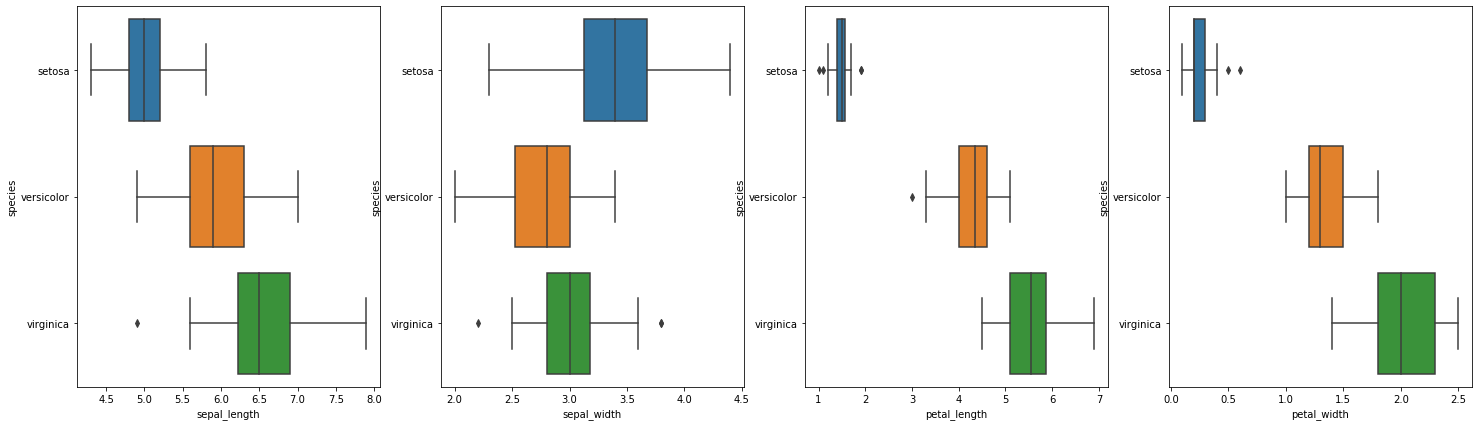

In [3]:
#Boxplot of Features

fig,ax=plt.subplots(nrows=1 ,ncols=4)

sns.boxplot(data=dataset,y='species',x='sepal_length',ax=ax[0])
sns.boxplot(data=dataset,y='species',x='sepal_width',ax=ax[1])
sns.boxplot(data=dataset,y='species',x='petal_length',ax=ax[2])
sns.boxplot(data=dataset,y='species',x='petal_width',ax=ax[3])
fig.set_figwidth(25)
fig.set_figheight(7)

Class Split
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


Text(0, 0.5, 'Count')

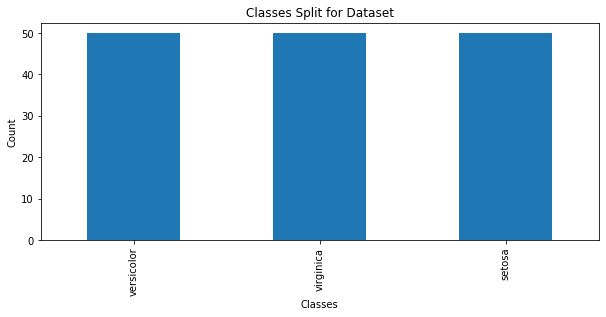

In [4]:
#Class Balance
print('Class Split')
print(dataset['species'].value_counts())
dataset['species'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [5]:
#Review Correlation between Variables
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [6]:
#Prepare for Models for Comparison

#Create x and y variables
x = dataset.drop('species', axis=1).to_numpy()
Y = dataset['species'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [9]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_gnb = Pipeline([('scl', StandardScaler()),
                    ('clf', GaussianNB())])

pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier())])

In [10]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,scoring='accuracy',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
   
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8, 1.01])
    plt.show()

GNB Learning Curve


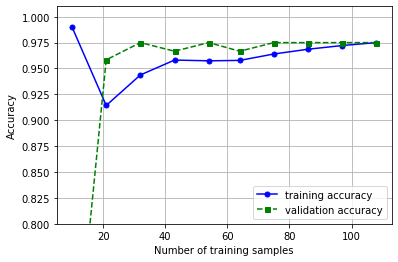


 k-NN Learning Curve


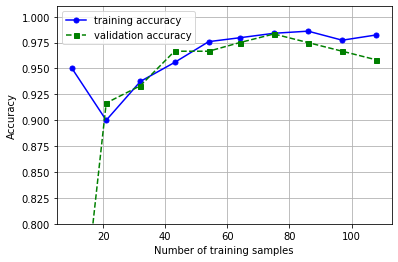

In [11]:
#Plot Learning Curve
print('GNB Learning Curve')
plot_learning_curves(pipe_gnb)
print('\n k-NN Learning Curve')
plot_learning_curves(pipe_knn)

In [12]:
#Original Model - KNN

#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score

k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn_org = KNeighborsClassifier(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_org, x_train2, y_train, cv=10, scoring='accuracy')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
#Print Best Score
BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]

#Create Orginal KNN model
classifier_org = KNeighborsClassifier(n_neighbors = best_k)

#Fit KNN Model
classifier_org.fit(x_train2, y_train)

#Prediction
from sklearn.metrics import classification_report, confusion_matrix  
y_pred_org = classifier_org.predict(x_test2)
target_names=['setosa','versicolor','virginica']
print('\nEstimator: k-NN')
print('\nn_neighbors:',str(best_k))
print('\n', confusion_matrix(y_test,y_pred_org))  
print(classification_report(y_test,y_pred_org,target_names=target_names))    


Estimator: k-NN

n_neighbors: 7

 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [13]:
#Original Model - NB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('NB', GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    target_names=['setosa','versicolor','virginica']
    print('\n', confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: NB

 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [14]:
#Prediction Dataset
                   
raw_data = {'sepal_length':[7.1],'sepal_width':[4.0],'petal_length':[3.1],
            'petal_width':[1.5]}

dfnew=pd.DataFrame(raw_data, columns = ['sepal_length', 'sepal_width',
                                        'petal_length', 'petal_width'])

dfnew

,sepal_length,sepal_width,petal_length,petal_width
0,7.1,4.0,3.1,1.5


In [17]:
#Prediction
print('Prediction GNB:',method.predict(dfnew))
print('Prediction kNN:',classifier_org.predict(dfnew))

Prediction GNB: ['virginica']
Prediction kNN: ['virginica']
